# 各科目のテストの点数から特徴量について考察する
データセットの形状の確認

In [3]:
import pandas as pd
df=pd.read_csv("exam_student.csv",encoding="shift-jis")
df

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
5,67,53,56,61,61,76,70,66,40
6,29,26,44,52,37,68,33,43,13
7,56,54,37,59,35,64,53,67,7
8,45,21,7,44,16,52,34,46,3
9,68,41,29,81,55,71,29,72,51


特に加工する必要がないため説明変数をそのまま取り出す

In [5]:
x=df.values
name=df.columns
print(x)
print(name)

[[30 43 51 ... 37 44 20]
 [39 21 49 ... 56 63 16]
 [29 30 23 ... 33 54  6]
 ...
 [45 26 29 ... 68 40 27]
 [73 31 43 ... 82 48 56]
 [60 85 89 ... 81 45 85]]
Index(['kokugo', 'shakai', 'sugaku', 'rika', 'ongaku', 'bijutu', 'taiiku',
       'gika', 'eigo'],
      dtype='object')


各科目の相関を求める

In [7]:
corr=df.corr()
corr

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
kokugo,1.000000,0.782622,0.718526,0.717996,0.707128,0.684195,0.413712,0.672814,0.761428
shakai,0.782622,1.000000,0.778242,0.834075,0.748877,0.608664,0.185622,0.678119,0.787477
sugaku,0.718526,0.778242,1.000000,0.817947,0.754571,0.575662,0.153075,0.582756,0.800563
rika,0.717996,0.834075,0.817947,1.000000,0.788183,0.594857,0.103854,0.726054,0.753886
ongaku,0.707128,0.748877,0.754571,0.788183,1.000000,0.654765,0.298004,0.591194,0.698030
bijutu,0.684195,0.608664,0.575662,0.594857,0.654765,1.000000,0.433882,0.542767,0.573575
taiiku,0.413712,0.185622,0.153075,0.103854,0.298004,0.433882,1.000000,0.146222,0.275560
gika,0.672814,0.678119,0.582756,0.726054,0.591194,0.542767,0.146222,1.000000,0.609608
eigo,0.761428,0.787477,0.800563,0.753886,0.698030,0.573575,0.275560,0.609608,1.000000


相関係数の可視化

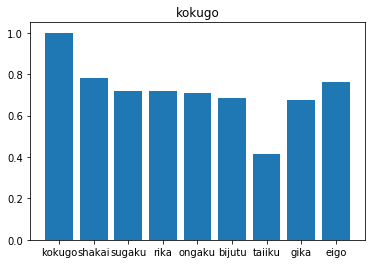

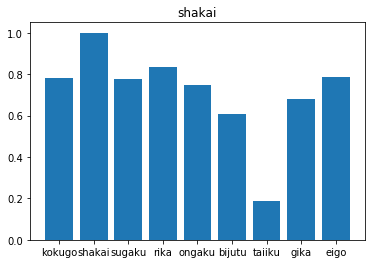

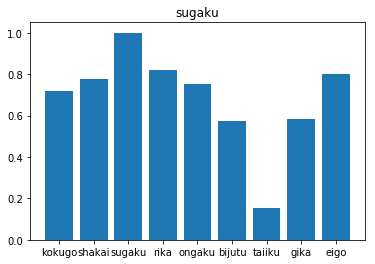

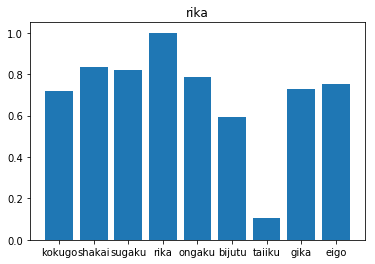

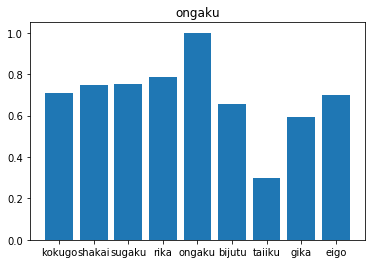

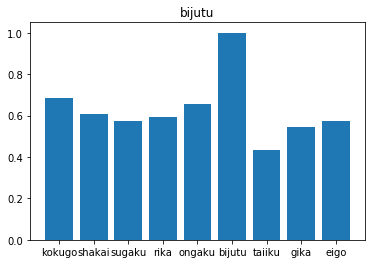

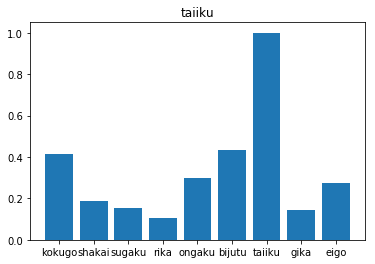

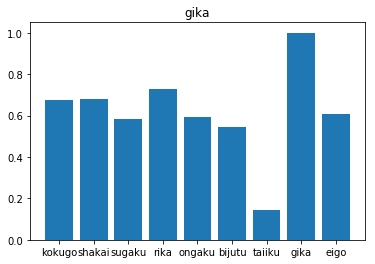

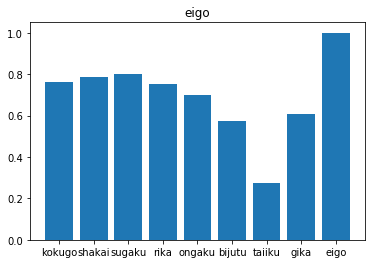

In [13]:
import matplotlib.pyplot as plt
import numpy as np
co=corr.values
l=np.arange(0,len(co[0]),1)
for i in range(len(co)):
    plt.bar(l,co[i],tick_label=name)
    plt.title(name[i])
    plt.show()

以上の結果から基本的に筆記試験において各科目は高い相関関係にあることが分かるが体育のみ相関がみられないことが分かる

次に主成分分析を用いる

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=len(x[0]))
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

寄与率を算出

In [19]:
con=pca.explained_variance_ratio_
outc=[]
tmp=[]
for i in range(len(con)):
    tmp.append("第"+str(i+1)+"主成分")
    tmp.append(con[i])
    outc.append(tmp)
    tmp=[]
dfc=pd.DataFrame(outc)
dfc.columns=["主成分","寄与率"]
dfc

,主成分,寄与率
0,第1主成分,0.657283
1,第2主成分,0.144536
2,第3主成分,0.055471
3,第4主成分,0.043258
4,第5主成分,0.025642
5,第6主成分,0.022355
6,第7主成分,0.022054
7,第8主成分,0.017499
8,第9主成分,0.011901


第二主成分までで累積寄与率が80%に達するため第二主成分までを用いる

固有ベクトルを算出する

In [24]:
fac=pca.components_
outf=[]
tmp=[]
for i in range(len(fac)):
    tmp.append("第"+str(i+1)+"主成分")
    for j in range(len(fac[i])):
        tmp.append(fac[i][j])
    outf.append(tmp)
    tmp=[]
dff=pd.DataFrame(outf)
name2=[]
name2.append("主成分軸")
for i in range(len(name)):
    name2.append(name[i])
dff.columns=name2
dff

,主成分軸,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,第1主成分,0.340992,0.340418,0.377917,0.337211,0.348190,0.223286,0.163919,0.303363,0.470443
1,第2主成分,-0.120165,0.116831,0.169666,0.200379,-0.005595,-0.160341,-0.927218,0.124045,0.045962
2,第3主成分,0.119137,0.028535,-0.325326,0.118743,0.020691,0.195716,-0.005502,0.746614,-0.518516
3,第4主成分,-0.146450,0.004407,0.214144,0.181831,0.640902,0.241405,-0.023909,-0.369743,-0.541572
4,第5主成分,-0.533034,-0.206397,0.063652,0.199739,0.310120,-0.601033,0.247405,0.314704,0.108005
5,第6主成分,0.339972,0.249376,0.467894,0.136004,-0.328349,-0.500502,0.162320,-0.048874,-0.444698
6,第7主成分,0.216430,0.529527,-0.619469,0.026237,0.304865,-0.386928,-0.029683,-0.207625,0.041015
7,第8主成分,-0.572485,0.533039,-0.058394,0.371801,-0.384160,0.257481,0.155818,-0.087448,-0.026135
8,第9主成分,0.243631,-0.447565,-0.258009,0.775666,-0.151791,-0.010004,0.008861,-0.215077,0.051240


第一主成分では体育が低く第二主成分では体育の値が大きいことが分かる

次に因子負荷量を求める

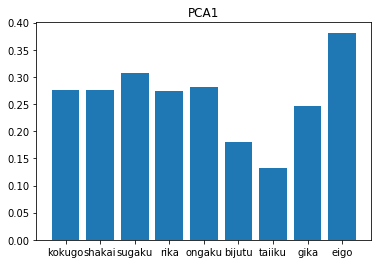

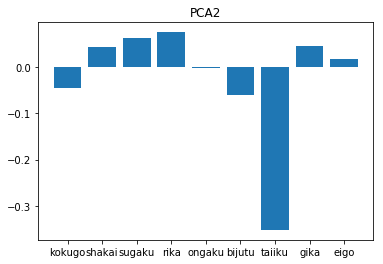

In [25]:
factor1=np.sqrt(con[0])*fac[0]
factor2=np.sqrt(con[1])*fac[1]
plt.bar(l,factor1,tick_label=name)
plt.title("PCA1")
plt.show()
plt.bar(l,factor2,tick_label=name)
plt.title("PCA2")
plt.show()

第一主成分では数値が高ければ体育以外の点数が高いことが分かり、第二主成分では数値が低ければ体育の点数が高いことが分かる

主成分の特性が分かったため二次元に圧縮してデータを可視化する

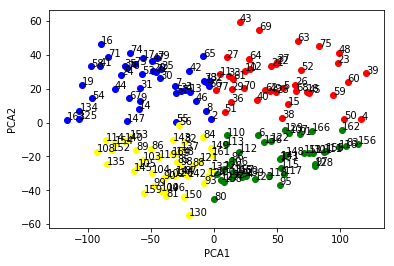

In [34]:
tx=pca.transform(x)
for i in range(len(tx)):
    plt.text(tx[i][0],tx[i][1],str(i+1))
    if tx[i][0]>=0 and tx[i][1]>=0:
        plt.scatter(tx[i][0],tx[i][1],color="red")
    elif tx[i][0]>=0 and tx[i][1]<0:
        plt.scatter(tx[i][0],tx[i][1],color="green")
    elif tx[i][0]<0 and tx[i][1]>=0:
        plt.scatter(tx[i][0],tx[i][1],color="blue")
    else:
        plt.scatter(tx[i][0],tx[i][1],color="yellow")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# データの解釈
このグラフの見方として第一主成分では高い数値だと筆記試験が高く、第二主成分は低い数値だと体育の点数が高いことが分かるつまり緑の部分に全体的に優秀な成績を取った人が集まり、青の部分にはどちらの成績も良くない人が集まっていると推測できる。一方で真ん中付近のデータは色に関係なく平均的な成績であることが分かる。